# Transforming data using linear algebra

FMML Module 1, Lab 4<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 25 October 2021 <br>



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
#@title

from IPython.display import Latex as lt
#Plotting functions 
#(You DON'T need to understand how these functions)

# function to plot a grid 
def plotGrid(transform, unit, linestyle = ':', fig=None, ax=None):
  lim1 = -100
  lim2 = 100
  def mat2xy(start, end):
    if len(start.shape)==1:
      start = np.expand_dims(start,0)
      end = np.expand_dims(end,0)
    nan = np.ones(len(start))*np.nan
    x = np.stack((start[:,0], end[:,0], nan)).T.reshape(-1)
    y = np.stack((start[:,1], end[:,1], nan)).T.reshape(-1)
    return x, y

  def parallellines(axis, addend, lines, unit):
    addend = np.repeat(np.expand_dims(addend,0), lines*2, 0) 
    unit = np.expand_dims(np.arange(-lines, lines)*unit,1)
    unit = unit-lines
    addend = addend*unit
    lines = np.expand_dims(axis,0) + addend
    return np.concatenate((lines, lines*-1))

  if fig is None:
    fig, ax = plt.subplots(figsize=(10,10))
  transform = transform.astype(np.float)
  xaxis = transform[0]
  yaxis = transform[1]
    
  # plot lines parallel to the x axis
  lines1= parallellines(xaxis*lim1, yaxis, 100,unit )
  lines2 = parallellines(xaxis*lim2, yaxis, 100,unit )
  x,y = mat2xy(lines1, lines2)
  plt.plot(x,y, linestyle+'k', linewidth=0.5)
  # plot x axis
  x,y = mat2xy(xaxis*lim1, xaxis*lim2)
  plt.plot(x,y,linestyle, color = '#440077')

  # plot  lines parallel to the y axis
  lines1= parallellines(yaxis*lim1, xaxis, 100,unit)
  lines2 = parallellines(yaxis*lim2, xaxis, 100,unit)
  x,y = mat2xy(lines1, lines2)
  plt.plot(x,y, linestyle+'k', linewidth=0.5)
  # plot y axis
  x,y = mat2xy(yaxis*lim1, yaxis*lim2)
  plt.plot(x,y,linestyle, color= '#aa5500')

  return fig, ax

def plotData(X, y, xlabel = 'hole', ylabel = 'bound', fig=None, ax = None):

  if fig is None:
    fig, ax = plt.subplots()
  for ii in range(nclasses):
    plt.scatter(X[y==ii,0], X[y==ii, 1])
  plt.legend([str(i) for i in range(nclasses)])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  lim2 = X.max() 
  lim1 = X.min() 
  add = abs(lim1-lim2)/5
  return fig, ax


# Matrix transformations on data

A 2D coordinate system is defined by its basis vectors, i and j. In the standard coordinate system (Let us call it T0), the basis vectors are

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\} 
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 1\end{aligned} \right\} \end{equation}$$

We can use any two vectors as basis vectors for a new coordinate system as long as they are not colinear. For example, let us call this new coordinate system T1:

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ -1 \end{aligned} \right\} 
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 2 \end{aligned} \right\} \end{equation}$$

Suppose we have a point [a,b] in the T1 coordinate system. Its representation in the standard system T0 can be obtained by the following matrix multiplication:

$$ \begin{equation} 
\left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} = 
\left\{  \begin{aligned}&1 & 0 \\ -&1 & 2 \end{aligned} \right\}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\}
\end{equation}$$
where the columns of the matrix are the basis vectors of T1. 

Let us see this in action:


In [ ]:
T0 = np.array([[1,0],[0,1]])
T1 = np.array([[1,0], [-1,2]])

data1 = np.array([5,4]) # the data in T1 coordinate system
data2 = np.array([0,2])

print("data1 before:", data1)
print("T1: ", T1)
print("T1 Transpose:", T1.T)
print("mat multi: ", np.matmul(T1, data1))

data0 = np.matmul(T1, data1) # the data in T0 coordinate system
data2t1 = np.matmul(T1, data2)

print('Data in T0 = ', data0)
print('Data in T1 = ', data1)

print("Data 2 in T1 = ", data2t1)

data1 before: [5 4]
T1:  [[ 1  0]
 [-1  2]]
T1 Transpose: [[ 1 -1]
 [ 0  2]]
mat multi:  [5 3]
Data in T0 =  [5 3]
Data in T1 =  [5 4]
Data 2 in T1 =  [0 4]


We can visualize this below. T0 is shown with dotted lines and T1 is shown with solid lines. 

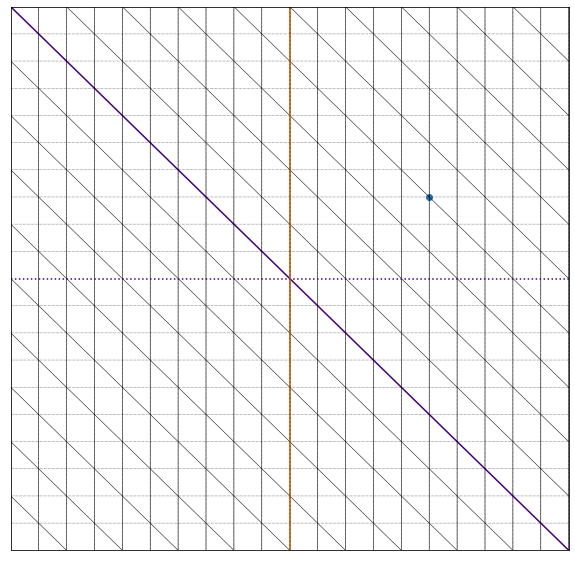

In [ ]:
fig, ax = plotGrid(T1.T, 1,'-') # custom plotting function, no need to understand this
plotGrid(T0.T, 1, fig=fig, ax=ax) # custom plotting function, no need to understand this
plt.scatter(data0[0], data0[1])
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xticks([]);
ax.set_yticks([]);


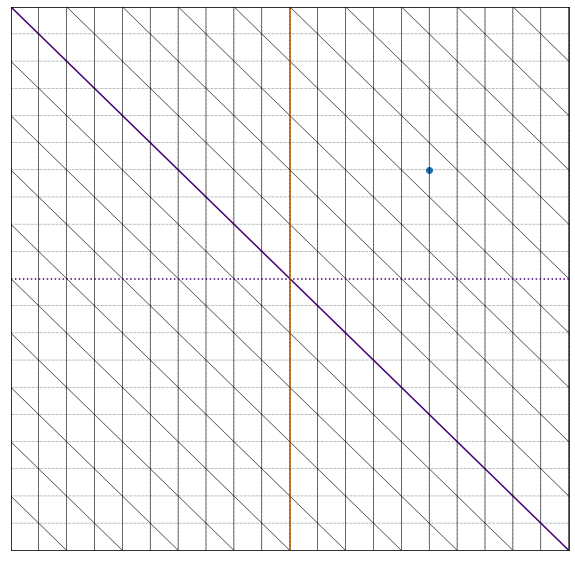

In [ ]:
fig, ax = plotGrid(T1.T, 1,'-') # custom plotting function, no need to understand this
plotGrid(T0.T, 1, fig=fig, ax=ax) # custom plotting function, no need to understand this
plt.scatter(data0[0], data2t1[1])
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xticks([]);
ax.set_yticks([]);

Look at the coordinates of the blue dot. In T0 (dotted lines), the position is [5,3] where it is [5,4] in T1. Feel free to experiment with different data points and coordinate systems. 

Remember that we can achieve the same thing by post-multiplying the transpose of the transformation matrix to the data. This will come in handy when transforming multiple data points at once:

In [ ]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(T1.T)
print(data0_a)
print(data0_b)

[[ 1 -1]
 [ 0  2]]
[5 3]
[5 3]


Why is transforming data useful? Data transformations cause the distance between data points to change. This will affect distance-based algorithms such as nearest neighbour

In [ ]:
# let us define 3 points in T1
A1 = np.array([3,3])
B1 = np.array([2,-5])
C1 = np.array([1,-1])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)

# function to calculate Euclidean distance:
def dist(a, b):
  diff = a-b
  sq = diff*diff
  return np.sqrt(sq.sum())

# distance between the points in T1
print('Distance between A and B in T1 = ', dist(A1, B1))
print('Distance between B and C in T1 = ', dist(B1, C1))
print('Distance between A and C in T1 = ', dist(A1, C1))

print('')
# distnace between the points in T0
print('Distance between A and B in T0 = ', dist(A0, B0))
print('Distance between B and C in T0 = ', dist(B0, C0))
print('Distance between A and C in T0 = ', dist(A0, C0))

Distance between A and B in T1 =  8.06225774829855
Distance between B and C in T1 =  4.123105625617661
Distance between A and C in T1 =  4.47213595499958

Distance between A and B in T0 =  15.033296378372908
Distance between B and C in T0 =  9.055385138137417
Distance between A and C in T0 =  6.324555320336759


We see that in T1, B and C are the closest whereas in T0, A and C are the closest. These kinds of changes will affect the predictions returned by the nearest neighbour algorithm. 

# Transformations on MNIST

Let us experiment with a subset of the MNIST dataset. We will extract two features from the database for our experiment. 

Functions for nearest neighbour, accuracy and feature extraction. (from previous labs)

In [ ]:
#@title

def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary




Get the MNIST dataset:

In [ ]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y<nclasses]
train_y = train_y[train_y<nclasses]
test_X = test_X[test_y<nclasses]
test_y = test_y[test_y<nclasses]

train_X = train_X[::100].copy() # We are only taking a subset of the training set
train_y = train_y[::100].copy() # do the same to the labels
test_X = test_X[::100].copy() # taking a subset of the test set. This code takes every 500th sample
test_y = test_y[::100].copy()

# get all the features
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
train_hull = np.array([getHullPixels(i).sum() for i in train_X])
test_hull = np.array([getHullPixels(i).sum() for i in test_X])
train_sum = np.sum(train_X, (1,2))/(28*28)
test_sum = np.sum(test_X, (1,2))/(28*28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack((train_hole,train_bound)).transpose()
test_feats = np.vstack((test_hole, test_bound)).transpose()

train_feats2 = np.vstack((train_hull,train_sum)).transpose()
test_feats2 = np.vstack((test_hull, test_sum)).transpose()

train_feats3 = np.vstack((train_hull,train_hole)).transpose()
test_feats3 = np.vstack((test_hull, test_hole)).transpose()

train_feats4 = np.vstack((train_sum,train_hole)).transpose()
test_feats4 = np.vstack((test_sum, test_hole)).transpose()

train_feats5 = np.vstack((train_bound,train_hull)).transpose()
test_feats5 = np.vstack((test_bound, test_hull)).transpose()

train_featsall = np.vstack((train_hole, train_bound, train_sum,train_hole)).transpose()
test_featsall = np.vstack((test_hole, test_bound, test_sum, test_hole)).transpose()

Let us plot the samples and see what they look like:

(-50.0, 150.0)

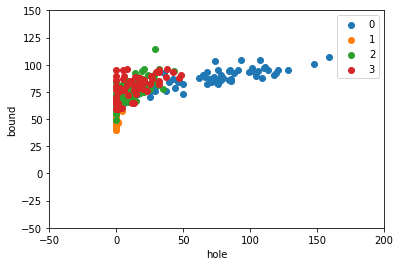

In [ ]:
# fix limits of x and y axis so that we can see what is going on
xlim=[-50,200]
ylim=[-50,150]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

Text(0, 0.5, 'Sum')

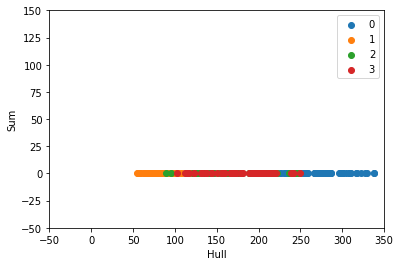

In [ ]:
xlim=[-50,350]
ylim=[-50,150]
fig, ax = plotData(train_feats2, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Hull")
ax.set_ylabel("Sum")

Text(0, 0.5, 'Hole')

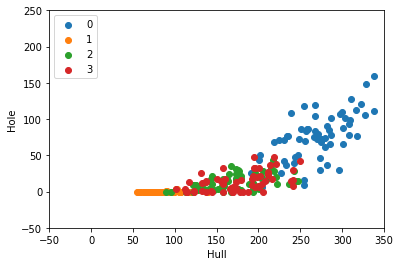

In [ ]:
xlim=[-50,350]
ylim=[-50,250]
fig, ax = plotData(train_feats3, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Hull")
ax.set_ylabel("Hole")

Text(0, 0.5, 'Hole')

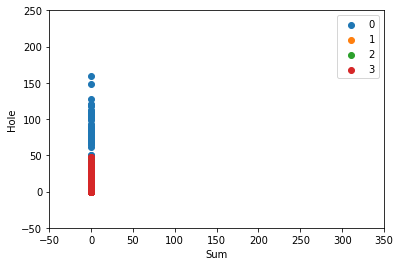

In [ ]:
xlim=[-50,350]
ylim=[-50,250]
fig, ax = plotData(train_feats4, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Sum")
ax.set_ylabel("Hole")

Check the baseline accuracy on the test set:

In [ ]:
# This looks to be best features are Hole and boundary which can classify the classes 1 2 3 4 with accuracy 76%

test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print('Baseline accuracy using  Hole and Boundary Features = ', acc)

Baseline accuracy using  Hole and Boundary Features =  0.7619047619047619


In [ ]:
test_pred = NN(train_feats2, train_y, test_feats2)
acc = Accuracy(test_y, test_pred)
print('Baseline accuracy using  Hull and Sum Features = ', acc)

Baseline accuracy using  Hull and Sum Features =  0.6666666666666666


In [ ]:
test_pred = NN(train_feats3, train_y, test_feats3)
acc = Accuracy(test_y, test_pred)
print('Baseline accuracy using  Hull and Hole Features = ', acc)

Baseline accuracy using  Hull and Hole Features =  0.7380952380952381


In [ ]:
test_pred = NN(train_feats4, train_y, test_feats4)
acc = Accuracy(test_y, test_pred)
print('Baseline accuracy using  Sum and Hole Features = ', acc)

Baseline accuracy using  Sum and Hole Features =  0.6904761904761905


In [ ]:
test_pred = NN(train_feats5, train_y, test_feats5)
acc = Accuracy(test_y, test_pred)
print('Baseline accuracy using  Boundary and Hull Features = ', acc)

Baseline accuracy using  Boundary and Hull Features =  0.6904761904761905


In [ ]:
test_pred = NN(train_featsall, train_y, test_featsall)
acc = Accuracy(test_y, test_pred)
print('Baseline accuracy using  all 4 features: Hole, Hull, Sum and Boundary Features = ', acc)

Baseline accuracy using  all 4 features: Hole, Hull, Sum and Boundary Features =  0.7380952380952381


Let us try transforming the features and checking their accuracy:

In [ ]:
transform1 = np.array([[0.5, -0.5],[0, 2.5]])

train_feats_t1 = np.matmul(train_feats, transform1)
test_feats_t1 = np.matmul(test_feats, transform1)  # whatever transform we are applying to the training set should be applied to the test set also

Text(0.5, 1.0, 'Applied transformation on Hole and boundary features')

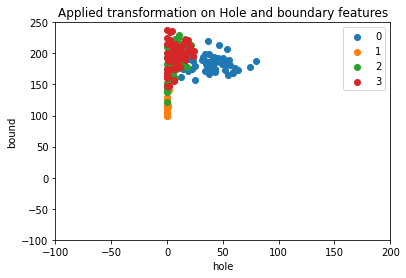

In [ ]:
fig, ax = plotData(train_feats_t1, train_y)
xlim=[-100,200]
ylim=[-100,250]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title("Applied transformation on Hole and boundary features")

In [ ]:
test_pred = NN(train_feats_t1, train_y, test_feats_t1)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform1 = ', acc)

Accuracy after transform1 =  0.8095238095238095


In [ ]:
# transformation1 for features for features hull and sum

transform1 = np.array([[0.5, -0.5],[0, 2.5]])

train_feats_t12 = np.matmul(train_feats2, transform1)
test_feats_t12 = np.matmul(test_feats2, transform1)  # whatever transform we are applying to the training set should be applied to the test set also

Text(0, 0.5, 'Sum')

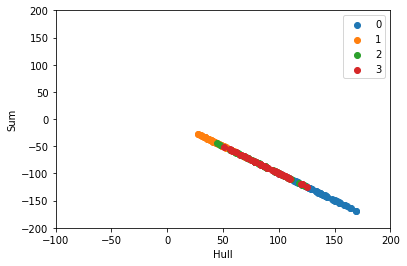

In [ ]:
fig, ax = plotData(train_feats_t12, train_y)
xlim=[-100,200]
ylim=[-200,200]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Hull")
ax.set_ylabel("Sum")

In [ ]:
test_pred = NN(train_feats_t12, train_y, test_feats_t12)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform1 on features Hull and Sum = ', acc)

Accuracy after transform1 on features Hull and Sum =  0.7619047619047619


In [ ]:
# transformation1 for features for features hull and hole
transform1 = np.array([[0.5, -0.5],[0, 2.5]])

train_feats_t13 = np.matmul(train_feats3, transform1)
test_feats_t13 = np.matmul(test_feats3, transform1)

Text(0, 0.5, 'Hole')

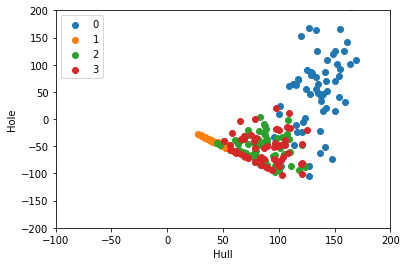

In [ ]:
fig, ax = plotData(train_feats_t13, train_y)
xlim=[-100,200]
ylim=[-200,200]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Hull")
ax.set_ylabel("Hole")

In [ ]:
test_pred = NN(train_feats_t13, train_y, test_feats_t13)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform1 on features Hull and Hole = ', acc)

Accuracy after transform1 on features Hull and Hole =  0.5714285714285714


In [ ]:
# transformation1 for features for features Sum and hole
transform1 = np.array([[0.5, -0.5],[0, 2.5]])

train_feats_t14 = np.matmul(train_feats4, transform1)
test_feats_t14 = np.matmul(test_feats4, transform1)

Text(0, 0.5, 'Hole')

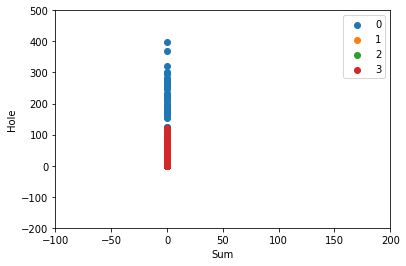

In [ ]:
fig, ax = plotData(train_feats_t14, train_y)
xlim=[-100,200]
ylim=[-200,500]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Sum")
ax.set_ylabel("Hole")

In [ ]:
test_pred = NN(train_feats_t14, train_y, test_feats_t14)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform1 on features Sum and Hole = ', acc)

Accuracy after transform1 on features Sum and Hole =  0.6666666666666666


In [ ]:
# Apply transformation2 on the hole and boundary features 

transform2 = np.array([[0.1, -0.1],[0.2, -0.2]])

train_feats_t21 = np.matmul(train_feats, transform2)
test_feats_t21 = np.matmul(test_feats, transform2)  

(-50.0, 0.0)

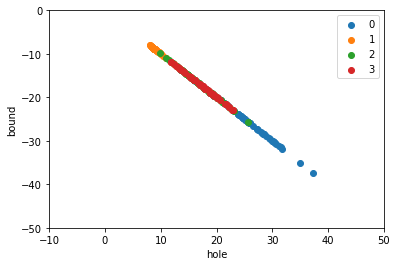

In [ ]:
fig, ax = plotData(train_feats_t21, train_y)
xlim=[-10,50]
ylim=[-50,0]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [ ]:
test_pred = NN(train_feats_t21, train_y, test_feats_t21)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform2 on Hole and Boundary= ', acc)

Accuracy after transform2 on Hole and Boundary=  0.7142857142857143


In [ ]:
# transformation2 on Hull and sum
transform2 = np.array([[0.1, -0.1],[0.2, -0.2]])

train_feats_t22 = np.matmul(train_feats2, transform2)
test_feats_t22 = np.matmul(test_feats2, transform2)

Text(0, 0.5, 'Sum')

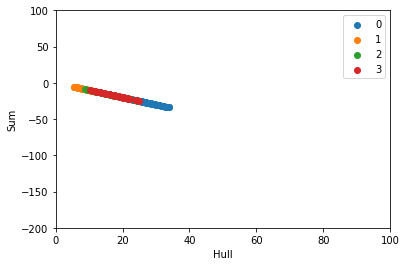

In [ ]:
fig, ax = plotData(train_feats_t22, train_y)
xlim=[0,100]
ylim=[-200,100]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Hull")
ax.set_ylabel("Sum")

In [ ]:
test_pred = NN(train_feats_t22, train_y, test_feats_t22)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform2 on Hull and Sum = ', acc)

Accuracy after transform2 on Hull and Sum =  0.7142857142857143


In [ ]:
# Transformation2 on the Hull and Hole

train_feats_t23 = np.matmul(train_feats3, transform2)
test_feats_t23 = np.matmul(test_feats3, transform2)

Text(0, 0.5, 'Hole')

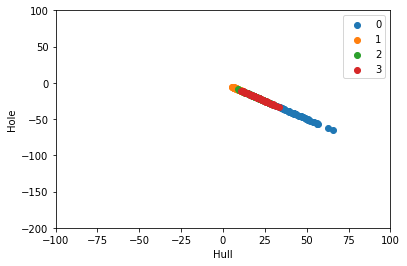

In [ ]:
fig, ax = plotData(train_feats_t23, train_y)
xlim=[-100,100]
ylim=[-200,100]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Hull")
ax.set_ylabel("Hole")

In [ ]:
test_pred = NN(train_feats_t23, train_y, test_feats_t23)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform2 on Hull and Hole = ', acc)

Accuracy after transform2 on Hull and Hole =  0.6904761904761905


In [ ]:
# Transformation2 on the Sum and Hole

train_feats_t24 = np.matmul(train_feats4, transform2)
test_feats_t24 = np.matmul(test_feats4, transform2)

Text(0, 0.5, 'Hole')

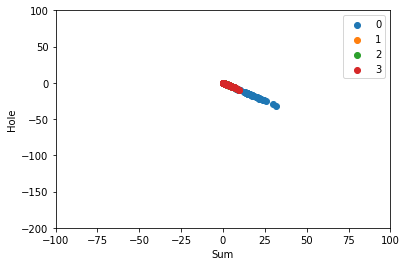

In [ ]:
fig, ax = plotData(train_feats_t24, train_y)
xlim=[-100,100]
ylim=[-200,100]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Sum")
ax.set_ylabel("Hole")

In [ ]:
test_pred = NN(train_feats_t24, train_y, test_feats_t24)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform2 on Sum and Hole = ', acc)

Accuracy after transform2 on Sum and Hole =  0.7142857142857143


In [ ]:
# transformation 3 on features hole and boundary 
transform3 = np.array([[0.86, -0.95],[0.8, 1.5]])

train_feats_t31 = np.matmul(train_feats, transform3)
test_feats_t31 = np.matmul(test_feats, transform3)

(-100.0, 250.0)

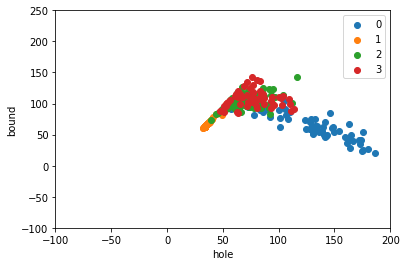

In [ ]:
fig, ax = plotData(train_feats_t31, train_y)
xlim=[-100,200]
ylim=[-100,250]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [ ]:
test_pred = NN(train_feats_t31, train_y, test_feats_t31)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform3 on Hole and Boundary = ', acc)

Accuracy after transform3 on Hole and Boundary =  0.7857142857142857


In [ ]:
# transformation 3 on features Hull and Sum 
transform3 = np.array([[0.86, -0.95],[0.8, 1.5]])

train_feats_t32 = np.matmul(train_feats2, transform3)
test_feats_t32 = np.matmul(test_feats2, transform3)

Text(0, 0.5, 'Sum')

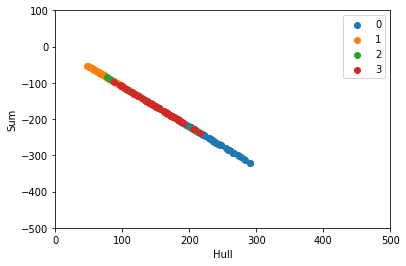

In [ ]:
fig, ax = plotData(train_feats_t32, train_y)
xlim=[0,500]
ylim=[-500,100]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Hull")
ax.set_ylabel("Sum")

In [ ]:
test_pred = NN(train_feats_t32, train_y, test_feats_t32)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform3 on Hull and Saum = ', acc)

Accuracy after transform3 on Hull and Saum =  0.7619047619047619


In [ ]:
# transformation 3 on features Hull and Hole
transform3 = np.array([[0.86, -0.95],[0.8, 1.5]])

train_feats_t33 = np.matmul(train_feats3, transform3)
test_feats_t33 = np.matmul(test_feats3, transform3)

Text(0, 0.5, 'Hole')

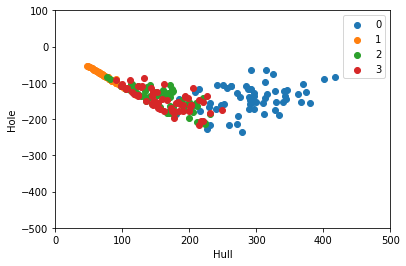

In [ ]:
fig, ax = plotData(train_feats_t33, train_y)
xlim=[0,500]
ylim=[-500,100]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Hull")
ax.set_ylabel("Hole")

In [ ]:
test_pred = NN(train_feats_t33, train_y, test_feats_t33)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform3 on Hull and Hole = ', acc)

Accuracy after transform3 on Hull and Hole =  0.6904761904761905


In [ ]:
transform3 = np.array([[0.86, -0.95],[0.8, 1.5]])

train_feats_t34 = np.matmul(train_feats4, transform3)
test_feats_t34 = np.matmul(test_feats4, transform3)

Text(0, 0.5, 'Hole')

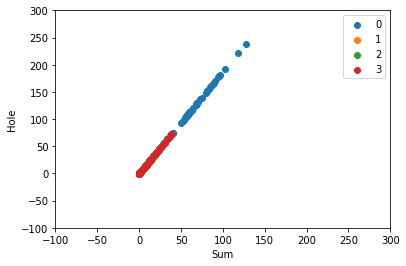

In [ ]:
fig, ax = plotData(train_feats_t34, train_y)
xlim=[-100,300]
ylim=[-100,300]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Sum")
ax.set_ylabel("Hole")

In [ ]:
test_pred = NN(train_feats_t34, train_y, test_feats_t34)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform3 on Sum and Hole = ', acc)

Accuracy after transform3 on Sum and Hole =  0.6666666666666666


In [ ]:
# Apply transformation 4 on Hole and Boundary

transform4 = np.array([[0.3, 0.2],[-0.7, 0.7]])

train_feats_t41 = np.matmul(train_feats, transform4)
test_feats_t41 = np.matmul(test_feats, transform4)  

(-100.0, 200.0)

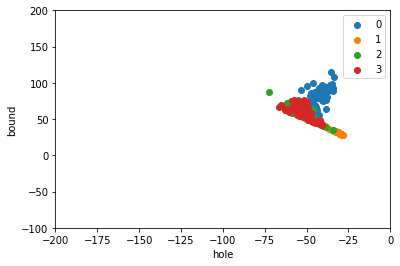

In [ ]:
fig, ax = plotData(train_feats_t41, train_y)
xlim=[-200,0]
ylim=[-100,200]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [ ]:
test_pred = NN(train_feats_t41, train_y, test_feats_t41)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform4 on Hole and Boundary = ', acc)

Accuracy after transform4 on Hole and Boundary =  0.8095238095238095


In [ ]:
# transformation 4 on features Hull and Sum 
transform4 = np.array([[0.3, 0.2],[-0.7, 0.7]])

train_feats_t42 = np.matmul(train_feats2, transform4)
test_feats_t42 = np.matmul(test_feats2, transform4)

Text(0, 0.5, 'Sum')

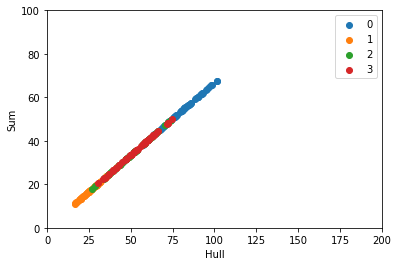

In [ ]:
fig, ax = plotData(train_feats_t42, train_y)
xlim=[0,200]
ylim=[0,100]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Hull")
ax.set_ylabel("Sum")

In [ ]:
test_pred = NN(train_feats_t42, train_y, test_feats_t42)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform4 on Hole and Sum = ', acc)

Accuracy after transform4 on Hole and Sum =  0.7619047619047619


In [ ]:
# transformation 4 on features Hull and Hole
transform4 = np.array([[0.3, 0.2],[-0.7, 0.7]])

train_feats_t43 = np.matmul(train_feats3, transform4)
test_feats_t43 = np.matmul(test_feats3, transform4)

Text(0, 0.5, 'Hole')

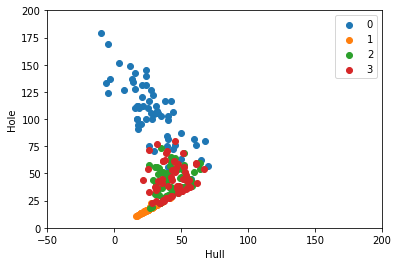

In [ ]:
fig, ax = plotData(train_feats_t43, train_y)
xlim=[-50,200]
ylim=[0,200]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Hull")
ax.set_ylabel("Hole")

In [ ]:
test_pred = NN(train_feats_t43, train_y, test_feats_t43)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform4 on Hull and Hole = ', acc)

Accuracy after transform4 on Hull and Hole =  0.6190476190476191


In [ ]:
# transformation 4 on features  Sum and Hole 
transform4 = np.array([[0.3, 0.2],[-0.7, 0.7]])

train_feats_t44 = np.matmul(train_feats4, transform4)
test_feats_t44 = np.matmul(test_feats4, transform4)

Text(0, 0.5, 'Hole')

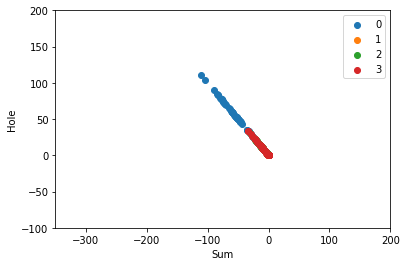

In [ ]:
fig, ax = plotData(train_feats_t44, train_y)
xlim=[-350,200]
ylim=[-100,200]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Sum")
ax.set_ylabel("Hole")

In [ ]:
test_pred = NN(train_feats_t44, train_y, test_feats_t44)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform4 on Sum and Hole = ', acc)

Accuracy after transform4 on Sum and Hole =  0.6666666666666666


In [ ]:
transform4 = np.array([[0.3, 0.2],[-0.7, 0.7]])

train_feats_t45 = np.matmul(train_feats5, transform4)
test_feats_t45 = np.matmul(test_feats5, transform4)

Text(0, 0.5, 'Hull')

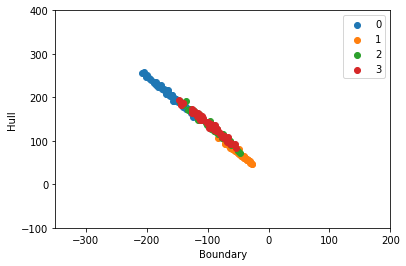

In [ ]:
fig, ax = plotData(train_feats_t45, train_y)
xlim=[-350,200]
ylim=[-100,400]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Boundary")
ax.set_ylabel("Hull")

In [ ]:
test_pred = NN(train_feats_t45, train_y, test_feats_t45)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform4 on Boundary and Hull = ', acc)

Accuracy after transform4 on Boundary and Hull =  0.6428571428571429


## Questions:
1. Experiment with different transformation matrices and check the accuracy

Feature set1 (FS1) : Hole and Boundary
Feature set2 (FS2): Hull and Sum
Feature Set3 (FS3): Hull and Hole
Feature Set4 (FS4): Sum and Hole
Feature set5 (FS5): Boundary and Hull
Feature set6 (FS6): All features combined


Transformation matrix T1: [[0.5, -0.5]
                            [0, 2.5]]

                      T2: [[0.1, -0.1]
                           [0.2, -0.2]]
                          
                      T3: [[0.86, -0.95]
                           [0.8, 1.5]]

                      T4: [[0.3, 0.2]
                           [-0.7, 0.7]]



       FS1        FS2      FS3      FS4      FS5        FS6
T1     80.9%      76.1%    57.1%    66.6%     -

T2     71.4%      71.4%    69.0%    71.4%     -

T3     78.5%      76.1%    69.0%    66.6%     -

T4     80.9%      76.1%    61.9%    66.6%    64.2

BAcc   76.1%      66.6%    73.8%    69.0%    69.0       73.8%


The above is tabular formate of the accuracues with respect to the featureset and the transformations applied on them.

I can be said that Hole and Boundary as the best feature to classify the dataset which had accuracy of 80.9% for both transformation 1 and 4. This is better than overall baseline accuracy obtained by combaining all the four features came to 73.8%


2. Will the same transform used for these two features also work for other features?
The accuracy was different when the same transformation was applied on other combinational pair features.

It is also noted that by applying transformation 4 all the five feature sets were able to give high accuracy than the rest other transformations. 



# Data normalization

Sometimes the features of our data have vastly different scales. This will cause the learning algorithm to give more importance to certain features, reducing its performance. Data normalization is a method in which we transform the features so that they have similar scales. 

Three commonly used feature scaling techniques are rescaling, mean normalization and z-score normalization. Here, we will talk about the simplest one: rescaling. 

$$\begin{equation}
x' = \frac {x -min(x)} { max(x) - min(x)}
\end{equation}$$



For more information, see [this page](https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02).

In [ ]:
def rescale(data):
  return (data - data.min())/(data.max() - data.min())

We have to apply the rescaling to each feature individually. Also remember to apply the same transform we are using on the train set to the test set. 

In [ ]:
train_feats_rescaled_x = rescale(train_feats[:,0])
train_feats_rescaled_y = rescale(train_feats[:,1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y),1)

test_feats_rescaled_x = rescale(test_feats[:,0])
test_feats_rescaled_y = rescale(test_feats[:,1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y),1)

Let us plot the rescaled features:

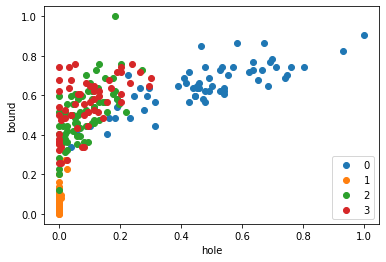

In [ ]:
fig, ax = plotData(train_feats_rescaled, train_y)


This type of rescaling makes all the features between 0 and 1. 

Let us calculate the accuracy obtained by this transform:

In [ ]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform = ', acc)

Accuracy after transform =  0.8095238095238095


All 2D linear transformations can be repreented by a transformation matrix. So what is the matrix associated with the rescaling function? Actually, we cannot represent rescaling with a matrix multiplication, because it is not a linear transform. Rescaling involves shifting the origin of the data, which is not allowed under linear transformations.

We can represent rescaling as a matrix multiplication followed by a vector addition. Let our first feature vector be called X and second feature vector be called Y. Suppose we want to rescale a data point [a,b]

$$ \begin{equation}
 \left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} = 
 \left\{  \begin{aligned} \frac{a - min(X)}{max(X) - min(X)} \\ \frac{b - min(Y)}{max(Y) - min(Y)} \end{aligned} \right\} =
 \left\{  \begin{aligned}&\frac{1}{max(X)-min(X)} &0\\ &0 &\frac{1}{max(Y)-min(Y)} \end{aligned} 
 \right\}\left\{  \begin{aligned}a \\ b \end{aligned} \right\} + 
 \left\{  \begin{aligned} \frac{ -min(X)}{max(X) - min(X)} \\ \frac{-min(Y)}{max(Y) - min(Y)} \end{aligned} \right\}
\end{equation}$$

You can verify this yourself if you wish, though it is not necessary. 

